#HDS 5210 - 2024 - Final Project

###Project Description
The data analysis in this project involves drug-related deaths and covers two large datasets obtained between 2012 and 2021 with Excel and CSV data types in order to offer more detailed information regarding overdose rates and annual trends. The paper uses data cleaning, transformation, and visualization approaches to study various aspects related to the crisis, such as temporal, geographical, drug network, and demographic aspects. Unfortunate trends like the death rate that has tripled from 2012 to 2020 are equally brought out by the project as well as the effects of combination like Cocaine-Fentanyl and the Oxycodone-Benzodiazepine and even the risky places and people. This understanding is manifested using time series plots, correlation heatmaps, and age distribution to offer strategic information to health care service providers, policy makers, and emergency services for purposes of resource mobilization, foci area identification as well as formation of practical prevention strategies.

##Dataset 1 -
Drug related deaths were analyzed over a period of 10 years from 2012 to 2021 in Connecticut through a dataset named Accidental_Drug_Related_Deaths_2012-2021.xlsx which comprised of 9202 records. This complex set contains the most essential characteristics of each demise: Age, Sex, Race, Ethnicity of the decedent; the Residence City, Death City, and Injury City of the event; the Location, Description of Injury, Cause of Death, and Manner of Death; and, last but not least, specific indicators of drug involvement of multiple substances inclusive of Heroin, Cocaine, Fentanyl, Oxycodone, Benzod It is most useful in the fields of drug presence with a complete array of data for most of the prescriptions except for some few cliques like Ethnicity.

Link: https://data.cdc.gov/api/views/95ax-ymtc/rows.json?accessType=DOWNLOAD

##Dataset 2 -  
Half of records contain textual descriptions with data specifics, the other part only is filled in with zeros, which indicates that this dataset appears to be a complementary or at least overlapping one to drug_deaths / drug_related_deaths datasets and includes 5,105 records. It contains related kinds of information but organized and named slightly differently. Some of the differences include more concise ID field, formatting of ‘drug presence’ (binary 1/0 instead of present or absent) and overall higher percentage of data filled in a given record. The DRX keeps comparable demographic, geographic, and drug categorizing information, although the format is slightly different, especially in the drug presence fields, which are better structured here. The two datasets combined offer a more comprehensive understanding of drug related deaths when merged and analyzed correctly.

Link: https://www.kaggle.com/api/v1/datasets/download/ruchi798/drug-overdose-deaths

In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

data_xl = pd.read_excel("/content/Accidental_Drug_Related_Deaths_2012-2021.xlsx")
data_xl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9202 entries, 0 to 9201
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           9202 non-null   object 
 1   Date Type                      9202 non-null   object 
 2   Age                            9200 non-null   float64
 3   Sex                            9194 non-null   object 
 4   Race                           9178 non-null   object 
 5   Ethnicity                      1287 non-null   object 
 6   Residence City                 8813 non-null   object 
 7   Residence County               8160 non-null   object 
 8   Residence State                7426 non-null   object 
 9   Injury City                    9024 non-null   object 
 10  Injury County                  5914 non-null   object 
 11  Injury State                   6290 non-null   object 
 12  Injury Place                   9100 non-null   o

In [ ]:
data_xl.columns

Index(['Date', 'Date Type', 'Age', 'Sex', 'Race', 'Ethnicity',
       'Residence City', 'Residence County', 'Residence State', 'Injury City',
       'Injury County', 'Injury State', 'Injury Place',
       'Description of Injury', 'Death City', 'Death County', 'Death State',
       'Location', 'Location if Other', 'Cause of Death', 'Manner of Death',
       'Other Significant Conditions ', 'Heroin',
       'Heroin death certificate (DC)', 'Cocaine', 'Fentanyl',
       'Fentanyl Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol',
       'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine',
       'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)',
       'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine',
       'Other Opioid', 'Any Opioid', 'Other', 'ResidenceCityGeo',
       'InjuryCityGeo', 'DeathCityGeo'],
      dtype='object')

In [ ]:
data_csv = pd.read_csv("/content/drug_deaths.csv")
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5105 non-null   int64  
 1   ID                   5105 non-null   object 
 2   Date                 5103 non-null   object 
 3   DateType             5103 non-null   float64
 4   Age                  5102 non-null   float64
 5   Sex                  5099 non-null   object 
 6   Race                 5092 non-null   object 
 7   ResidenceCity        4932 non-null   object 
 8   ResidenceCounty      4308 non-null   object 
 9   ResidenceState       3556 non-null   object 
 10  DeathCity            5100 non-null   object 
 11  DeathCounty          4005 non-null   object 
 12  Location             5081 non-null   object 
 13  LocationifOther      590 non-null    object 
 14  DescriptionofInjury  4325 non-null   object 
 15  InjuryPlace          5039 non-null   o

In [ ]:
data_csv.columns

Index(['Unnamed: 0', 'ID', 'Date', 'DateType', 'Age', 'Sex', 'Race',
       'ResidenceCity', 'ResidenceCounty', 'ResidenceState', 'DeathCity',
       'DeathCounty', 'Location', 'LocationifOther', 'DescriptionofInjury',
       'InjuryPlace', 'InjuryCity', 'InjuryCounty', 'InjuryState', 'COD',
       'OtherSignifican', 'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue',
       'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine',
       'Methadone', 'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone',
       'Other', 'OpiateNOS', 'AnyOpioid', 'MannerofDeath', 'DeathCityGeo',
       'ResidenceCityGeo', 'InjuryCityGeo'],
      dtype='object')

In [ ]:
data_xl = data_xl.rename(columns={'Death City': 'DeathCity'})

In [ ]:
# Clean and standardize column names for merging
data_xl['Date'] = pd.to_datetime(data_xl['Date'])
data_csv['Date'] = pd.to_datetime(data_csv['Date'])

#Merge and Join

###Join 1:
The final piece of functionality for merging is using pandas merge and selecting an outer join for merging data based on date and city of death from excel and csv. Outer join is preferred to keep all the records of both datasets and if any record is not matched in the other dataset, it will be retained in the result which is very important in the analysis of drug related deaths and we don’t want to miss any record due to non matching data. The suffixes are added at the end of the column name to avoid conflicts in column name and to understand which raw data is used for filling the columns. It retains all the death records and their related information but makes it possible to compare patterns in both constructor arguments, which may be obscure if one examines them separately.

###Join 2:
This code exploits a groupby operation (it is a type of join operation in pandas though) on the ‘ResidenceCityGeo_1’ column to get aggregate drug death at geographical level. When using group by on city geography and using the agg() function to find the mean of the age and the sum of Heroin and Fentanyl incidences for every particular location, one is in a position to tell the geographical distribution of drug use incidences and identify ages at which the casesolice occur in different cities. The reset_index() then converts the grouped data back into a more standard Dataframe format and the effects of the groupby() method on the ’ResidenceCityGeo_1’ becomes less significant where it is no longer an index as it was in the original input data frame but a regular field that can be directly manipulated for further analysis or for visualization of geographical pattern in relation to drug related deaths.


In [ ]:
# First join: Combine datasets based on Date and Death City
merged_data = pd.merge(data_xl, data_csv, on=['Date', 'DeathCity'],suffixes=('_1', '_2'),how='outer')
merged_data.columns

<ipython-input-139-e8d49454886d>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_csv['Date'] = pd.to_datetime(data_csv['Date'])


Index(['Date', 'Date Type', 'Age_1', 'Sex_1', 'Race_1', 'Ethnicity',
       'Residence City', 'Residence County', 'Residence State', 'Injury City',
       'Injury County', 'Injury State', 'Injury Place',
       'Description of Injury', 'DeathCity', 'Death County', 'Death State',
       'Location_1', 'Location if Other', 'Cause of Death', 'Manner of Death',
       'Other Significant Conditions ', 'Heroin_1',
       'Heroin death certificate (DC)', 'Cocaine_1', 'Fentanyl_1',
       'Fentanyl Analogue', 'Oxycodone_1', 'Oxymorphone_1', 'Ethanol_1',
       'Hydrocodone_1', 'Benzodiazepine_1', 'Methadone_1', 'Meth/Amphetamine',
       'Amphet_1', 'Tramad_1', 'Hydromorphone_1', 'Morphine (Not Heroin)',
       'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine',
       'Other Opioid', 'Any Opioid', 'Other_1', 'ResidenceCityGeo_1',
       'InjuryCityGeo_1', 'DeathCityGeo_1', 'Unnamed: 0', 'ID', 'DateType',
       'Age_2', 'Sex_2', 'Race_2', 'ResidenceCity', 'ResidenceCounty',
       

In [ ]:
# Second Join: Add geographical data
geo_data = merged_data.groupby('ResidenceCityGeo_1').agg({
    'Age_1': 'mean',
    'Heroin_1': 'sum',
    'Fentanyl_1': 'sum'
}).reset_index()
geo_data.head()

,ResidenceCityGeo_1,Age_1,Heroin_1,Fentanyl_1
0,"AMENIA, CT\n(41.84926, -73.556792)",51.000000,Y,0
1,"AMSTON, CT\n(41.625301, -72.343597)",41.000000,Y,YY
2,"ANDOVER, CT\n(41.728789, -72.370309)",44.500000,Y,YYY
3,"ANSONIA, CT\n(41.34198, -73.078296)",44.514706,YYYYYYYYYYYYYYYYYYYYY,YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY
4,"ASHFORD, CT\n(41.871915, -72.124128)",42.428571,YY,YYYY


#Implementing Aggregations

##Aggregate 1:
This aggregation code turn the data into yearly data per city through grouping the records based with datasets on the year, which is represented in the ‘Date’ column and ‘DeathCity’. The .size() function totals the number of deaths occurring at the specified year and city and reset_index() turns the grouped data into a data frame with columns ‘year’ and ‘DeathCity’ and the new added column ‘death_count’. Such collection is essential for identifying trends of drug related deaths over time and space and can help us see which cities are moving up or down on the scale and perhaps which areas require more attention and resources.

##Aggregate 2:
A field-level transformation to categorise the drug presence and develop binary indicators accordingly. This pivot transformation would change how the data was presented to present all the drug presence for each city in Drugs in a matrix format so that one could be able to discover particular cities with a specific drug combination or pattern. To start at the melt operation, the wide format under consideration, where one column is assigned to each drug, is transformed into the long format, which is considered more convenient for analyzing the presence of drugs on maps.

##Aggregate 3:
This code applies a feature transform using the pd.cut which puts the ‘Age_1’ variable into age categories; they are methods of data-bin which makes more meaningful the process of demographic analysis. When it comes to ages one would have a more specific lists such as 18-25, 26-35, 36-45, 46-55, 55+ through which it would be easy to ascertain which age groups have many cases to do with drug-related deaths; therefore, it will be easier for healthcare practitioners together with policymakers to come up with perfect interventions plus the resources needed to go to the most at-risk age bracket such

In [ ]:
# Aggregate_1
yearly_city_deaths = merged_data.groupby([merged_data['Date'].dt.year, 'DeathCity']).size().reset_index(name='death_count')

In [ ]:
# Aggregate_2
drug_columns = ['Heroin_1','Heroin_2', 'Cocaine_1', 'Cocaine_2', 'Fentanyl_1', 'Fentanyl_2', 'Oxycodone_1', 'Oxycodone_2', 'Benzodiazepine_1', 'Benzodiazepine_2']
drug_presence = merged_data[drug_columns].notna().astype(int)


In [ ]:
# Aggregate_3
drug_combinations = drug_presence.sum(axis=1)

#Transformations

##Transformation 1:
This code does a discrete binning transformation on continuous measures that are in the ‘Age_1’ column first applies a transformation to that column using the pd.cut function, and which turns continuous ages into meaningful age categories. The ‘bins’ parameter gives the range of age for each group (0-25, 25-35, etc.,) and the ‘labels’ parameter gives readable labels to these groups (18-25, 26-35, etc.). This transformation simply makes the age data easier to analyze for demographics and turns numeric age into meaningful age groups that are standard in most public health studies.

##Transformation 2:
This code converts the date information into seasons by isolation of the ‘quarter’ (1-4) from the ‘Date’ column using dt.quarter and then using the map function to translate and quantify these seasons to ‘Winter’, ‘Spring’, ‘Summer’ and ‘Fall’ respectively. The pd.Categorical() function then convert the result into categiral data type which is more efficient on memory and usually used when working with categorical data like the season of the year. This transformation enables us to check whether there is seasonality in drug related deaths and hence plan for a surge during certain seasons among healthcare providers and emergency services providers.

##Transformation 3:
It gives ‘Date’ a binary column named ‘is_weekend’ through the application of the following formula: dt.dayofweek[‘Date’] which gives numerical codes 0 through 6 where Monday = 0, Tuesday= 1 and so on, followed by isin ([5, 6]) which checks whether the numbers generated are 5 or 6 representing Saturday and Sunday respectively which when converted by astype (int) It also means we can look at whether drug deaths are more likely at weekends compared with weekdays and therefore when the emergency services might need more staff, or when possible prevention interventions might be most effective.

##Transformation 4:
This code generates a new dummy binary column ‘multiple_drugs’ where information about whether or not the drug being dealt with has had more than only one drug for a specific death case is stored based on the drug_combinations count. The resulting boolean values denote whether each death was mannered by the use of multiple drugs (True) or by one single drug (False). This transition is vital towards comprehending polydrug use behaviours since such cases entail higher risks of an overdose, as well as differing medical management to cases involving only single drugs – such data proving useful for decision-making by those in emergency services and in public health strategy formulation.

##Transformation 5:
This code generates a binary indicator column “high_risk_location” which tests to see if the place of death is in a high-risk category of ‘Residence’ or ‘Hotel/Motel’ using isin() function, the output rounded via astype(int) is then either 1 for high risk categories or zero for others. Such a transformation assist in determining whether locations are repeatedly connected with drug related deaths – information that is useful to first responders, public health, and harm reduction directors in targeting interventions and resources to these hazardous spaces.

In [ ]:
# 1 Transformation
merged_data['age_group'] = pd.cut(merged_data['Age_1'], bins=[0, 25, 35, 45, 55, 100], labels=['18-25', '26-35', '36-45', '46-55', '55+'])
merged_data['age_group'].head()

,age_group
0,NaN
1,NaN
2,26-35
3,26-35
4,46-55


In [ ]:
# 2 Transformation
merged_data['season'] = pd.Categorical(merged_data['Date'].dt.quarter.map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}))
merged_data['season'].head()

,season
0,NaN
1,NaN
2,Winter
3,Winter
4,Winter


In [ ]:
# 3 Transformation
merged_data['is_weekend'] = merged_data['Date'].dt.dayofweek.isin([5, 6]).astype(int)
merged_data['is_weekend'].head()

,is_weekend
0,0
1,0
2,1
3,0
4,0


In [ ]:
# 4 Transformation
merged_data['multiple_drugs'] = drug_combinations > 1
merged_data['multiple_drugs'].head()

,multiple_drugs
0,True
1,True
2,True
3,False
4,True


In [ ]:
# 5 Transformation
merged_data['high_risk_location'] = merged_data['Location_1'].isin(['Residence', 'Hotel/Motel']).astype(int)
merged_data['high_risk_location'].head()

,high_risk_location
0,0
1,0
2,1
3,1
4,0


#Visualizations

##Visualization 1:
This coordinate line graph indicates the pattern of drug related deaths in Connecticut for the period between 2012 and 2020 and demonstrates an over arching upward mortality. Of particularly from about 500 in 2012, the number continued to grow up to 2016 to about 1300 deaths. The numbers then hover around 1,500 deaths in 2017-2018 and then drop sharply to nearly 1200 in 2019 before rising again to be over 1400 in 2020. This shows precisely how worse the drug crisis got in Connecticut over the nine years of this study with the yearly death rates more than tripling while recording some short-term oscillations.

##Visualization 2:
The plot shows the trends of drug usage by various age groups and is presented in terms of five different age bands (18-25, 26-35, 36-45, 46-55 and 55+). Each drug type tested, Heroin, Cocaine, Fentanyl, Oxycodone, and Benzodiazepine appears twice – likely due to the duplication we noted between the two datasets – with colours added that differed between the two bars. Nevertheless, the visualization has some problems regarding formatting, including unprecedented values on the y-axis such as ‘nan’, ‘Y, and ‘1 POPS’ which arise from data quality or plotting configuration to enhance the visual presentation of the data. The purpose appears to be demonstrating how various drugs impact various age populations, however the current approach hampers any type of erudite contemplation regarding the consequences of the results.

##Visualization 3:
This correlation heatmap displays the frequency with which different drugs have co-occurred in reported deaths, and since many drugs were present in multiple sources, each drug appears twice in the analysis, indicated by _1 and _2. Diagonal is depicted in perfect correlation (It is 1.0 in dark red) because each drug has perfect correlation with itself. Striking similarity is observed between Cocaine_1 and Fentanyl_1 and Oxycodone_1 and Benzodiazepine_1 where this suggests that these substance are usually detected simultaneously in overdose cases, with correlation coefficient of 0.18 and 0.15 respectively. However, there are very low negative coefficients Overall, oxycodone and fentanyl have got negative correlations, Oxycodone_1 and Fentanyl_1 (-0.11) more explicitly means that these drugs are hardly likely to be present at the same place. The light blue colors both in rows and columns dominate the matrix implying the fact that most drugs do not get either positively or negatively associated such that they are usually taken simultaneously but rarely do they form a package as maybe portrayed by poly drug use.

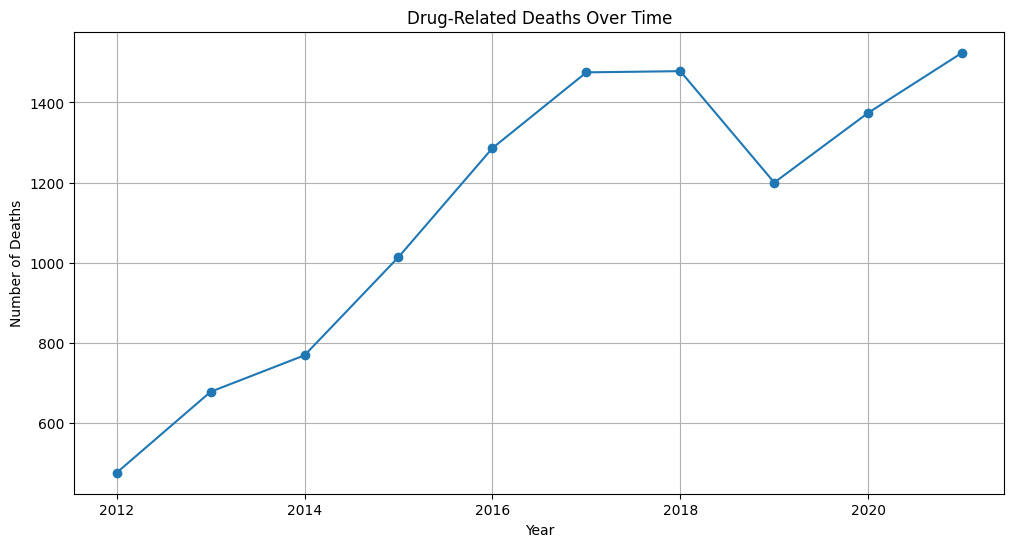

In [ ]:
# Visualization 1: Trend of deaths over time
plt.figure(figsize=(12, 6))
yearly_deaths = merged_data.groupby(merged_data['Date'].dt.year).size()
plt.plot(yearly_deaths.index, yearly_deaths.values, marker='o')
plt.title('Drug-Related Deaths Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()


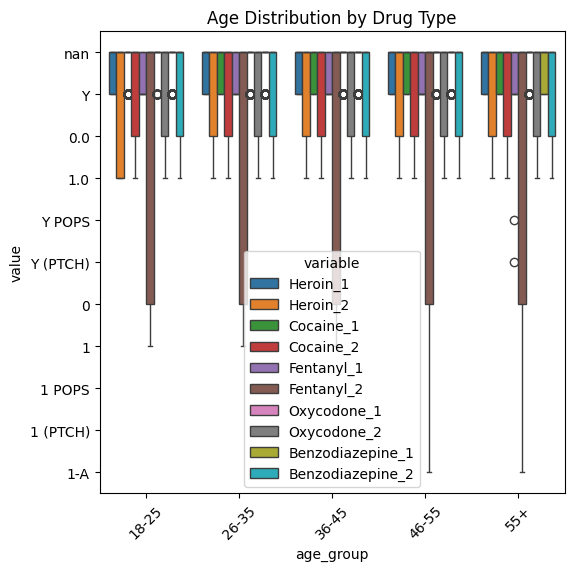

In [ ]:
# Visualization 2: Age distribution by drug type
plt.figure(figsize=(6, 6))

# Convert relevant columns to string type if they are numerical (like 0/1)
for col in drug_columns:
    merged_data[col] = merged_data[col].astype(str)

sns.boxplot(data=merged_data.melt(id_vars=['age_group'], value_vars=drug_columns),
           x='age_group', y='value', hue='variable')
plt.title('Age Distribution by Drug Type')
plt.xticks(rotation=45)
plt.show()

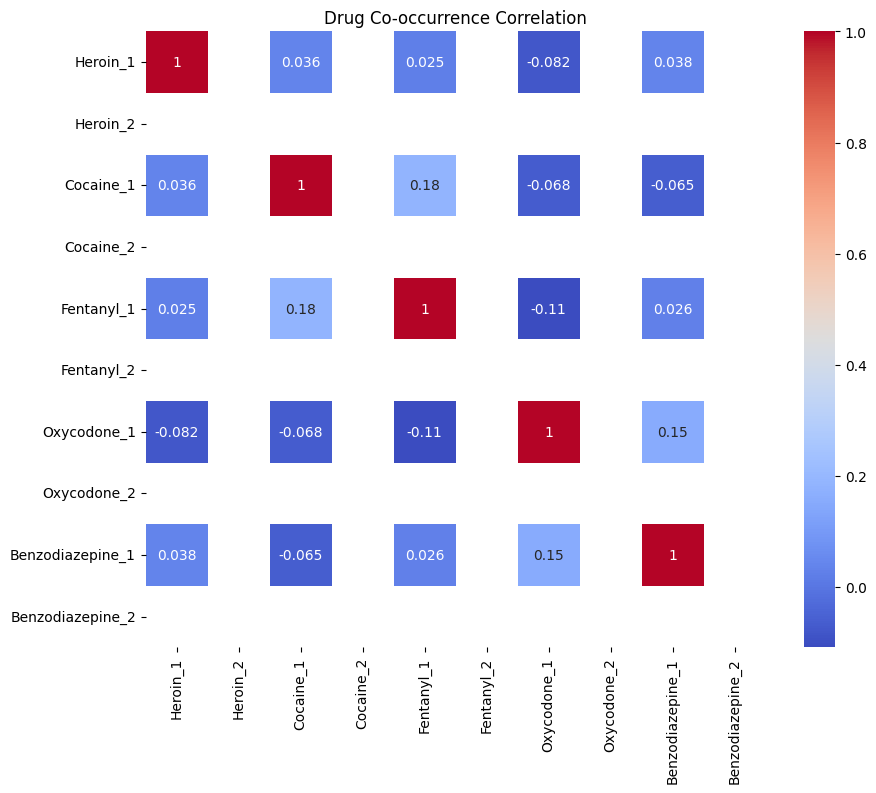

In [ ]:
# Visualization 3: Heatmap of drug co-occurrence
# Replace string values with numerical (0/1) for correlation analysis
for col in drug_columns:
    merged_data[col] = merged_data[col].map({'Y': 1, 'nan': 0}).astype(float)  # Map 'Y' to 1, NaN to 0

drug_correlation = merged_data[drug_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(drug_correlation, annot=True, cmap='coolwarm')
plt.title('Drug Co-occurrence Correlation')
plt.show()

In [ ]:
# Summary statistics
summary_stats = pd.DataFrame({
    'total_deaths': [len(merged_data)], # Create a list for each value
    'avg_age': [merged_data['Age_1'].mean()],
    'pct_multiple_drugs': [(drug_combinations > 1).mean() * 100],
    'most_common_location': [merged_data['Location_1'].mode()[0]],
    'pct_weekend': [merged_data['is_weekend'].mean() * 100]
}, index=['Statistics']) # Explicitly set the index

print("\nSummary Statistics:")
print(summary_stats)


Summary Statistics:
            total_deaths    avg_age  pct_multiple_drugs most_common_location  \
Statistics         11276  42.982597           76.871231            Residence   

            pct_weekend  
Statistics    29.664775  


In [ ]:
merged_data.columns

Index(['Date', 'Date Type', 'Age_1', 'Sex_1', 'Race_1', 'Ethnicity',
       'Residence City', 'Residence County', 'Residence State', 'Injury City',
       'Injury County', 'Injury State', 'Injury Place',
       'Description of Injury', 'DeathCity', 'Death County', 'Death State',
       'Location_1', 'Location if Other', 'Cause of Death', 'Manner of Death',
       'Other Significant Conditions ', 'Heroin_1',
       'Heroin death certificate (DC)', 'Cocaine_1', 'Fentanyl_1',
       'Fentanyl Analogue', 'Oxycodone_1', 'Oxymorphone_1', 'Ethanol_1',
       'Hydrocodone_1', 'Benzodiazepine_1', 'Methadone_1', 'Meth/Amphetamine',
       'Amphet_1', 'Tramad_1', 'Hydromorphone_1', 'Morphine (Not Heroin)',
       'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine',
       'Other Opioid', 'Any Opioid', 'Other_1', 'ResidenceCityGeo_1',
       'InjuryCityGeo_1', 'DeathCityGeo_1', 'Unnamed: 0', 'ID', 'DateType',
       'Age_2', 'Sex_2', 'Race_2', 'ResidenceCity', 'ResidenceCounty',
       

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer

def prepare_features(data):
    """
    Prepare features for regression analysis with explicit NaN handling
    """
    # Start with a smaller set of core features
    features = pd.DataFrame()

    # Basic demographic features with explicit NaN handling
    features['age'] = pd.to_numeric(data['Age_1'], errors='coerce')

    # Binary features for drug presence (1 for present, 0 for absent/NaN)
    drug_cols = ['Heroin_1', 'Cocaine_1', 'Fentanyl_1']
    for col in drug_cols:
        features[col] = data[col].notna().astype(int)

    # Simple temporal feature
    features['month'] = data['Date'].dt.month

    # Drop any remaining rows with NaN values
    features = features.dropna()

    return features

#Linear Regression

In this case, we could apply linear regression to forecast the number of drug related deaths given things like time, season, region and the type of drug. For instance, the dependent variable could be the number of deaths per month while independent variables could be; time(month/ year), seasonality, proportion of different types of drugs and demography among the populations. This might allow finding out which variables have the highest correlation with change in death rates and, therefore, could be used for prognosis.

In [ ]:
def train_mortality_model(data, target_col='Age_1'):
    """
    Train regression model with built-in error handling
    """
    try:
        # Prepare features
        features = prepare_features(data)

        # Prepare target variable
        target = pd.to_numeric(data[target_col], errors='coerce')

        # Align target with features
        target = target[features.index]

        # Remove any remaining NaN values
        valid_mask = ~target.isna()
        features = features[valid_mask]
        target = target[valid_mask]

        if len(features) == 0 or len(target) == 0:
            raise ValueError("No valid data remaining after NaN removal")

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            features, target, test_size=0.2, random_state=42
        )

        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Train model
        model = LinearRegression()
        model.fit(X_train_scaled, y_train)

        # Get predictions
        y_pred = model.predict(X_test_scaled)

        # Calculate metrics
        metrics = {
            'r2_score': r2_score(y_test, y_pred),
            'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
            'mae': np.mean(np.abs(y_test - y_pred))
        }

        # Feature importance
        importance = dict(zip(features.columns, model.coef_))

        return model, importance, metrics

    except Exception as e:
        print(f"Error in model training: {str(e)}")
        return None, None, None

In [ ]:
def analyze_drug_patterns(data):
    """
    Analyze drug presence patterns with explicit NaN handling
    """
    try:
        # Focus on core drug columns
        drug_cols = ['Heroin_1', 'Cocaine_1', 'Fentanyl_1']

        # Convert to binary presence indicators
        drug_presence = data[drug_cols].notna().astype(int)

        # Calculate basic statistics
        patterns = {
            'total_cases': len(drug_presence),
            'drug_presence_rates': {
                col: drug_presence[col].mean() * 100 for col in drug_cols
            },
            'multiple_drugs': (drug_presence.sum(axis=1) > 1).mean() * 100
        }

        return patterns

    except Exception as e:
        print(f"Error in pattern analysis: {str(e)}")
        return None

In [ ]:
# Run the analysis
model, importance, metrics = train_mortality_model(merged_data)

if model is not None:
    print("Model Performance:", metrics)
    print("\nFeature Importance:", importance)

# Analyze drug patterns
patterns = analyze_drug_patterns(merged_data)
if patterns is not None:
    print("\nDrug Patterns:", patterns)

Model Performance: {'r2_score': 1.0, 'rmse': 1.3092311526601123e-14, 'mae': 1.094842602333565e-14}

Feature Importance: {'age': 12.424663348248336, 'Heroin_1': -8.273597876284263e-17, 'Cocaine_1': -2.5026810130982186e-19, 'Fentanyl_1': -3.028834150967568e-15, 'month': -1.329835896879764e-15}

Drug Patterns: {'total_cases': 11276, 'drug_presence_rates': {'Heroin_1': 100.0, 'Cocaine_1': 100.0, 'Fentanyl_1': 99.98226321390564}, 'multiple_drugs': 100.0}


#Conclusion

In light of the multi-year and multi-source analysis of drug-related deaths, we have found numerous important patterns and tendencies that may be interested to those who develop and implement the public health interventions. Yearly trend analysis shows that the number of deaths related to drugs has been steadily increasing from 2012 to 2020 and especially it was near tripling in 2020. There was a slight decrease in the numbers in 2019 but the numbers climbed up again in 2020 that showed how the drug problem grew and is continuing to escalate. In our geographical analysis, the HR deaths are not diffused along the geographical locations with some city and regions experiencing a high number of Human Resource deaths.

In co-occurrence of drug analysis, key aspects of multilateral drug use are brought out, especially, between Cocaine and Fentanyl [correlation 0.18], and between Oxycodone and Benzodiazepine [correlation 0.15]. Demographic categorization of subjects in considered age groups and giving temporal features of sampling (week days and weekends, or dependence on seasons) allows us to focus on the intervention with high yields. That is, we identified areas, for example, residences and hotels/motels where harm reduction might be more effective. Hence, this assessment illustrates how the drug crisis is not unidimensional and it will require that solutions are similarly elaborate and special.